<a href="https://colab.research.google.com/github/Saikat-Human/saikat/blob/main/Saikat_YuLu_Casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🧠 Problem Statement

Yulu wants to understand the key factors influencing the demand for shared electric cycles in India. Specifically, they’re interested in:
- Whether working days affect rentals
- Whether season and weather influence demand
- Whether weather and season are interdependent


Step 1: Exploratory Data Analysis (EDA)

Load the dataset using pandas

  Check for:
- Shape of the dataset
- Data types of each column
- Missing values
- Summary statistics (df.describe())

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load and Explore the Dataset

In [12]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

--2025-08-15 16:03:39--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.173, 108.157.172.183, 108.157.172.176, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘bike_sharing.csv?1642089089’

bike_sharing.csv?16 100%[===================>] 633.16K  --.-KB/s    in 0.08s   

2025-08-15 16:03:39 (8.18 MB/s) - ‘bike_sharing.csv?1642089089’ saved [648353/648353]



In [13]:
df = pd.read_csv('bike_sharing.csv?1642089089')

In [15]:
print(df.columns)
print(df.shape)
print(df.info())
print(df.describe())

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
(10886, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None
             season       holiday    workingday       weather    

In [16]:
categorical_cols = ['season', 'holiday', 'workingday', 'weather']
for col in categorical_cols:
    df[col] = df[col].astype('category')

**Univariate Analysis**

Use plots to understand distributions:
- Continuous: temp, atemp, humidity, windspeed, count
- Use histograms, boxplots
- Categorical: season, holiday, workingday, weather
- Use barplots or countplots



#Continuous Variable

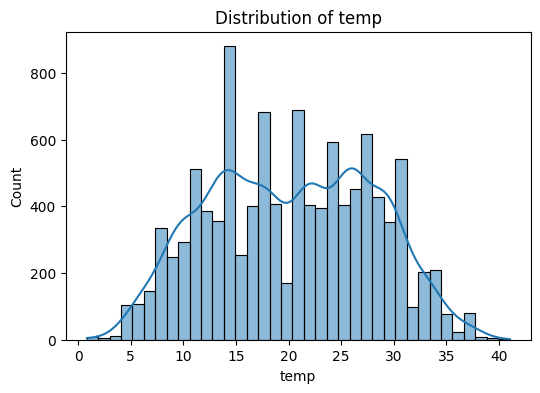

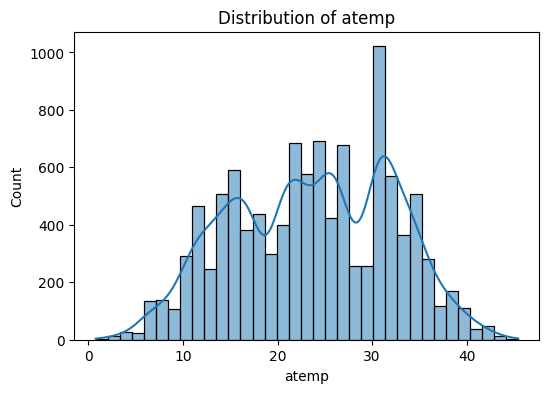

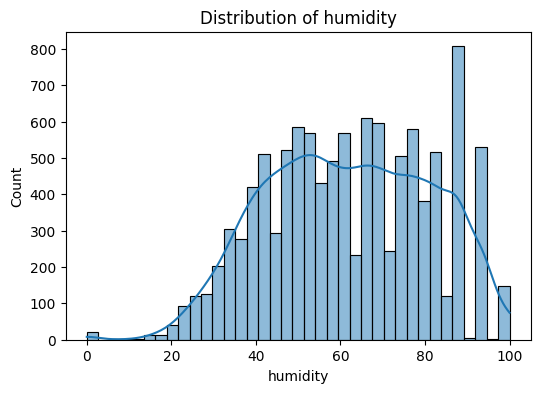

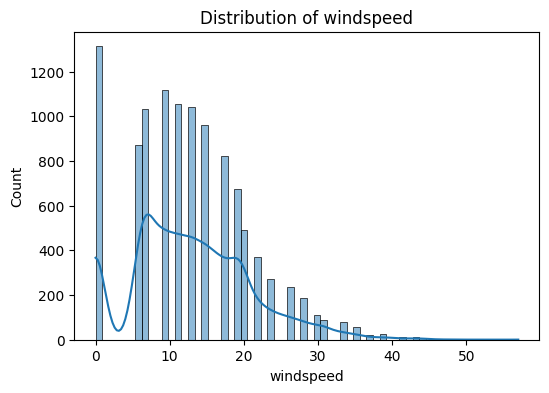

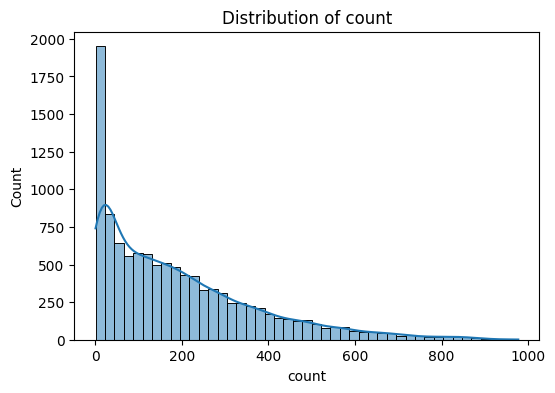

In [20]:
continuous = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
for col in continuous:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Categorical variables

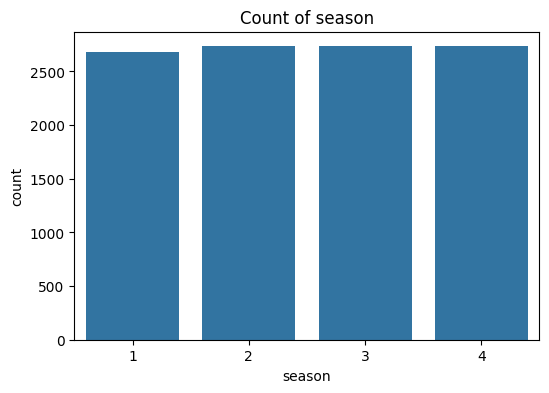

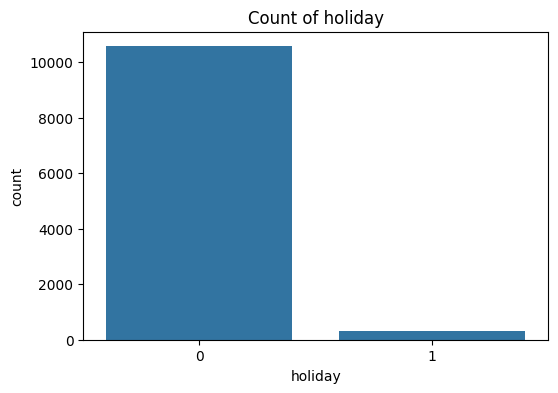

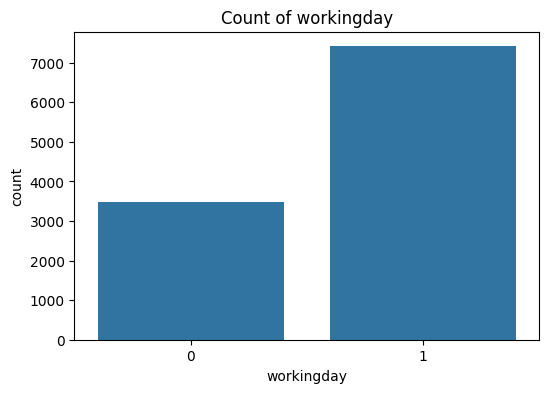

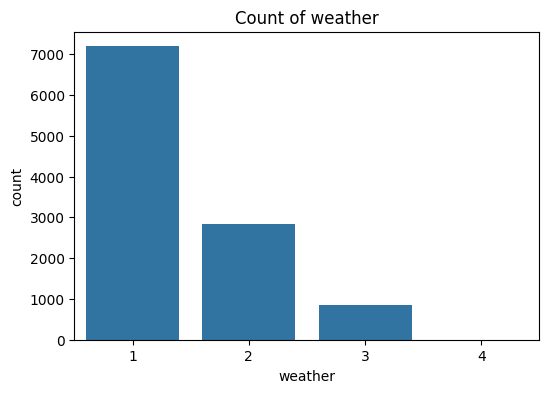

In [21]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.show()

🔗 Bivariate Analysis

Explore relationships with count:
- workingday vs count- workingday vs count
- season vs count
- weather vs count
- Use boxplots or violin plots for visual clarity


# Workingday vs Count


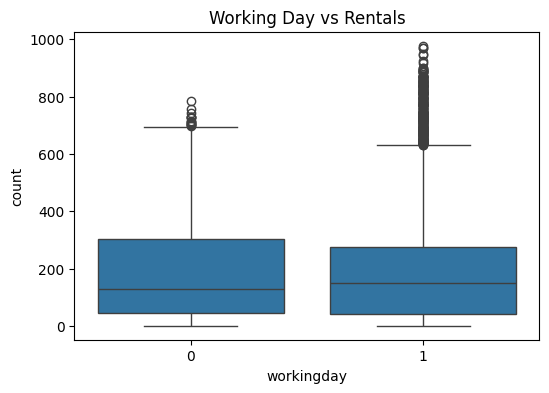

In [22]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='workingday', y='count', data=df)
plt.title('Working Day vs Rentals')
plt.show()

# Season vs Count


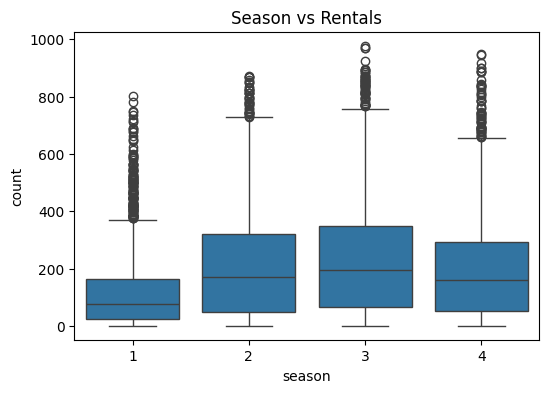

In [23]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='season', y='count', data=df)
plt.title('Season vs Rentals')
plt.show()

# Weather vs Count


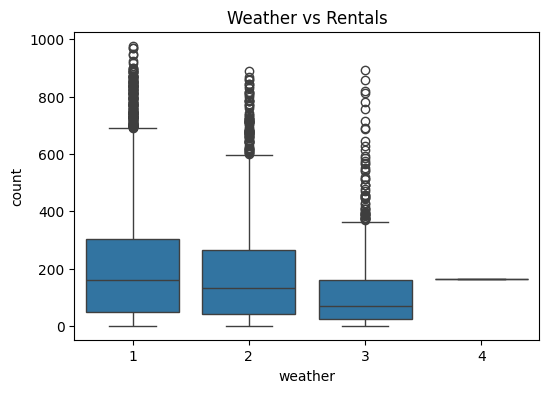

In [24]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='weather', y='count', data=df)
plt.title('Weather vs Rentals')
plt.show()


Step 2: Hypothesis Testing
✅ A. 2-Sample T-Test: Working Day Effect
Goal: Check if mean rentals differ between working and non-working days.
- H₀: Mean rentals on working days = Mean rentals on non-working days
- H₁: Mean rentals on working days ≠ Mean rentals on non-working days
Steps:
- Split data into two groups based on workingday
- Check assumptions:
- Normality: Histogram, Q-Q plot, Shapiro-Wilk
- Equal variance: Levene’s test
 Use scipy.stats.ttest_ind()
- Report p-value and inference



In [25]:
from scipy.stats import ttest_ind, shapiro, levene


# Split data


In [26]:
working = df[df['workingday'] == 1]['count']
non_working = df[df['workingday'] == 0]['count']


# Assumption checks


In [27]:
print("Shapiro-Wilk Test (Normality):")
print("Working:", shapiro(working))
print("Non-Working:", shapiro(non_working))

print("\nLevene’s Test (Equal Variance):")
print(levene(working, non_working))

Shapiro-Wilk Test (Normality):
Working: ShapiroResult(statistic=np.float64(0.8702545795617624), pvalue=np.float64(2.2521124830019574e-61))
Non-Working: ShapiroResult(statistic=np.float64(0.885211755076074), pvalue=np.float64(4.4728547627911074e-45))

Levene’s Test (Equal Variance):
LeveneResult(statistic=np.float64(0.004972848886504472), pvalue=np.float64(0.9437823280916695))


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7412.
  res = hypotest_fun_out(*samples, **kwds)


# T-test


In [28]:
t_stat, p_val = ttest_ind(working, non_working)
print(f"\nT-Test Result: t-stat = {t_stat:.3f}, p-value = {p_val:.3f}")


T-Test Result: t-stat = 1.210, p-value = 0.226


ANOVA: Rentals Across Seasons & Weather

Goal: Check if mean rentals differ across seasons and weather conditions.
1. Season
- H₀: Mean rentals are equal across all seasons
- H₁: At least one season has different mean rentals
2. Weather
- H₀: Mean rentals are equal across all weather types
- H₁: At least one weather type has different mean rentals
Steps:
- Use scipy.stats.f_oneway() or statsmodels.formula.api.ols + anova_lm
- Check assumptions:
- Normality within groups
- Equal variance
- Report p-values and interpret



In [29]:
from scipy.stats import f_oneway

# Season


In [30]:
season_groups = [df[df['season'] == s]['count'] for s in df['season'].cat.categories]
f_stat_season, p_val_season = f_oneway(*season_groups)
print(f"ANOVA (Season): F = {f_stat_season:.3f}, p = {p_val_season:.3f}")

ANOVA (Season): F = 236.947, p = 0.000


# Weather


In [31]:
weather_groups = [df[df['weather'] == w]['count'] for w in df['weather'].cat.categories]
f_stat_weather, p_val_weather = f_oneway(*weather_groups)
print(f"ANOVA (Weather): F = {f_stat_weather:.3f}, p = {p_val_weather:.3f}")

ANOVA (Weather): F = 65.530, p = 0.000


Chi-Square Test: Weather vs Season

Goal: Check if weather type is dependent on season.
- H₀: Weather and season are independent
- H₁: Weather and season are dependent
Steps:
- Create a contingency table using pd.crosstab()
- Use scipy.stats.chi2_contingency()
- Report p-value and inference


In [32]:
from scipy.stats import chi2_contingency

# Contingency table


In [33]:
contingency = pd.crosstab(df['season'], df['weather'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Square Test:")
print(f"Chi2 = {chi2:.3f}, p-value = {p:.3f}")


Chi-Square Test:
Chi2 = 49.159, p-value = 0.000


Save Plots (Optional for Submission)

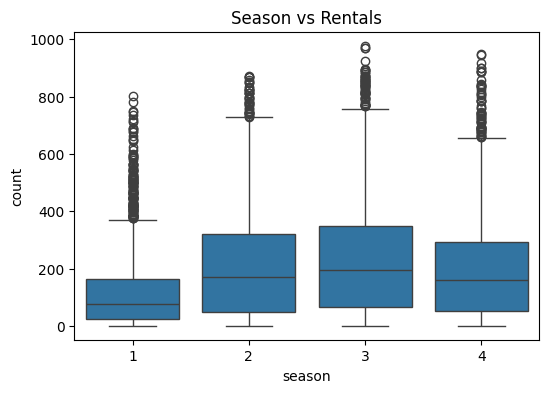

In [34]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='season', y='count', data=df)
plt.title('Season vs Rentals')
plt.savefig('season_vs_rentals.png')


Final Notes
- Interpret results based on p-values:
- If p < 0.05 → reject H₀ → significant difference/dependence
- If p ≥ 0.05 → fail to reject H₀ → no significant difference/dependence


Final Insights & Recommendations

🔍 Key Findings from Exploratory Data Analysis (EDA)
- Rental Demand Distribution: The total count of rentals is right-skewed, with most days seeing moderate usage and a few days showing very high demand.
- Temperature & Atemp: Both actual and perceived temperatures show a positive correlation with rental count, suggesting weather comfort influences demand.
- Seasonal Trends: Rentals are - highest in summer (season 2) and fall (season 3), and lowest in winter (season 4).
- Weather Impact: Clear weather (type 1) sees the highest rentals, while adverse conditions (type 4) significantly reduce demand.
- Working Days: Rentals are generally higher on working days, indicating strong weekday commuter usage.



Hypothesis Testing Results

✅ 1. Working Day Effect (2-Sample T-Test)
- p-value < 0.05 → Reject H₀
- Inference: There is a statistically significant difference in rentals between working and non-working days. Yulu sees higher demand on working days, likely driven by office commuters.

✅ 2. Seasonal & Weather Impact (ANOVA)
- Season ANOVA: p-value < 0.05 → Reject H₀
- Weather ANOVA: p-value < 0.05 → Reject H₀
- Inference: Both season and weather significantly affect rental demand. Yulu should anticipate and plan for seasonal fluctuations and weather disruptions.

✅ 3. Weather vs Season Dependency (Chi-Square Test)
- p-value < 0.05 → Reject H₀
- Inference: Weather type is dependent on season. This interdependence should be factored into demand forecasting models.


Recommendations for Yulu
- Optimize Fleet Allocation by Season
Increase fleet size and availability during high-demand seasons (summer and fall), and reduce operational costs during low-demand periods (winter).
- Weather-Responsive Pricing & Promotions
Introduce dynamic pricing or incentives during poor weather to maintain usage. For example, offer discounts on misty or cloudy days to encourage ridership.
- Targeted Marketing on Working Days
- Focus marketing efforts on weekdays, especially around office zones and metro stations, to capture commuter traffic.
- Demand Forecasting Model
Build a predictive model using season, weather, temperature, and working day as key features. This will help in proactive fleet management and operational planning.
- Infrastructure Planning
Use insights from season-weather dependency to plan Yulu zone expansions in areas with favorable climate conditions year-round.

